In [1]:
import pandas as pd,numpy as np

In [2]:
import sys
print(sys.platform)

linux


In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array , array_to_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import random

Using TensorFlow backend.


In [4]:
os.getcwd()

'/home/roshanbtech/Apparel_detection'

In [5]:
import zipfile
import os

In [6]:
# with zipfile.ZipFile('/home/roshanbtech/Apparel_detection/train_LbELtWX.zip', 'r') as zip_ref:
#     zip_ref.extractall('/home/roshanbtech/Apparel_detection')

In [7]:
# with zipfile.ZipFile('/home/roshanbtech/Apparel_detection/test_ScVgIM0.zip', 'r') as zip_ref:
#     zip_ref.extractall('/home/roshanbtech/Apparel_detection')

In [8]:
train_label = pd.read_csv('train.csv')

In [9]:
train_label.shape

(60000, 2)

In [10]:
train_label.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [11]:
train_label.tail()

,id,label
59995,59996,5
59996,59997,1
59997,59998,3
59998,59999,0
59999,60000,5


In [12]:
from tqdm import tqdm
import cv2

In [13]:
train_img = [] 
for i in tqdm(range(train_label.shape[0])):
    img = load_img('/home/roshanbtech/Apparel_detection/train/'+ str(train_label['id'][i]) + '.png',grayscale= True)
#     img = img.resize((128,128))
#     img = cv2.resize(img, (224, 224))
    img = img_to_array(img)
    img = img / 255
    train_img.append(img)

  0%|          | 0/60000 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [19:55<00:00, 50.18it/s]


In [14]:
# img = load_img('/home/roshanbtech/Apparel_detection/train/'+ str(train_label['id'][0]) + '.png', grayscale= True)

In [15]:
# img = img_to_array(img)

In [16]:
img.shape

(28, 28, 1)

In [17]:
train_img = np.array(train_img)

In [18]:
train_img.shape

(60000, 28, 28, 1)

In [19]:
y = train_label['label'].values

In [20]:
y

array([9, 0, 0, ..., 3, 0, 5])

In [21]:
y = to_categorical(y)

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(train_img,y,train_size = 0.8 ,random_state = 100)

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=0,
    
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

valid_datagen = ImageDataGenerator()
# train_generator = train_datagen.flow_from_dataframe(
#     train_df, 
#     "/home/roshanbtech/Untitled Folder/train/", 
#     x_col='filename',
#     y_col='category',
#     target_size=IMAGE_SIZE,
#     class_mode='categorical',
#     batch_size=BATCH_SIZE 
# )




In [26]:
y_train[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.16862746],
        [0.09803922],
        [0.03529412],
        [0.03921569],
        [0.01176471],
        

In [28]:
train_datagen.fit(X_train)

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalAveragePooling2D,AveragePooling2D
from keras.optimizers import adam,SGD

In [66]:
FAST_RUN = False
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS= 1
BATCH_SIZE = 50

In [68]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax')) # 10 because we have 10 classes 0-9

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)         

In [88]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [59]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'same', input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3),padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2),padding ='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)             

In [60]:
model.fit(X_train,y_train,epochs=50 , validation_data= (X_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 124s 3ms/step - loss: 0.4605 - accuracy: 0.8367 - val_loss: 0.2821 - val_accuracy: 0.8932
Epoch 2/50
48000/48000 [==============================] - 126s 3ms/step - loss: 0.3075 - accuracy: 0.8903 - val_loss: 0.2482 - val_accuracy: 0.9064
Epoch 3/50
48000/48000 [==============================] - 122s 3ms/step - loss: 0.2628 - accuracy: 0.9041 - val_loss: 0.2283 - val_accuracy: 0.9172
Epoch 4/50
48000/48000 [==============================] - 128s 3ms/step - loss: 0.2273 - accuracy: 0.9145 - val_loss: 0.2182 - val_accuracy: 0.9172
Epoch 5/50
48000/48000 [==============================] - 129s 3ms/step - loss: 0.2072 - accuracy: 0.9229 - val_loss: 0.2037 - val_accuracy: 0.9241
Epoch 6/50
48000/48000 [==============================] - 122s 3ms/step - loss: 0.1864 - accuracy: 0.9305 - val_loss: 0.2085 - val_accuracy: 0.9240
Epoch 7/50
48000/48000 [==============================] - 119s

In [40]:
model.fit(X_train,y_train,epochs=5 , validation_data= (X_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 129s 3ms/step - loss: 0.4848 - accuracy: 0.8298 - val_loss: 0.2831 - val_accuracy: 0.8946
Epoch 2/5
48000/48000 [==============================] - 123s 3ms/step - loss: 0.3232 - accuracy: 0.8848 - val_loss: 0.2429 - val_accuracy: 0.9082
Epoch 3/5
48000/48000 [==============================] - 122s 3ms/step - loss: 0.2822 - accuracy: 0.8962 - val_loss: 0.2259 - val_accuracy: 0.9139
Epoch 4/5
48000/48000 [==============================] - 119s 2ms/step - loss: 0.2517 - accuracy: 0.9088 - val_loss: 0.2231 - val_accuracy: 0.9183
Epoch 5/5
48000/48000 [==============================] - 128s 3ms/step - loss: 0.2312 - accuracy: 0.9150 - val_loss: 0.2089 - val_accuracy: 0.9227


In [107]:
model.save('model_50.h5')

In [103]:
model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = BATCH_SIZE), 
                    steps_per_epoch= len(X_train) // BATCH_SIZE, epochs= 10 ,
                   validation_data= valid_datagen.flow(X_test,y_test,batch_size = BATCH_SIZE),
                    validation_steps = len(X_test) // BATCH_SIZE,
                    use_multiprocessing= True)

Epoch 1/10
960/960 [==============================] - 105s 109ms/step - loss: 0.9395 - accuracy: 0.6458 - val_loss: 0.4720 - val_accuracy: 0.8046
Epoch 2/10
960/960 [==============================] - 102s 107ms/step - loss: 0.6648 - accuracy: 0.7494 - val_loss: 0.4394 - val_accuracy: 0.8384
Epoch 3/10
960/960 [==============================] - 104s 109ms/step - loss: 0.5980 - accuracy: 0.7771 - val_loss: 0.4558 - val_accuracy: 0.8470
Epoch 4/10
960/960 [==============================] - 104s 108ms/step - loss: 0.5558 - accuracy: 0.7952 - val_loss: 0.3130 - val_accuracy: 0.8722
Epoch 5/10
960/960 [==============================] - 102s 107ms/step - loss: 0.5241 - accuracy: 0.8075 - val_loss: 0.3865 - val_accuracy: 0.8776
Epoch 6/10
960/960 [==============================] - 102s 106ms/step - loss: 0.5040 - accuracy: 0.8159 - val_loss: 0.2750 - val_accuracy: 0.8840
Epoch 7/10
960/960 [==============================] - 102s 106ms/step - loss: 0.4778 - accuracy: 0.8230 - val_loss: 0.3096 -

Process ForkPoolWorker-99:
Process ForkPoolWorker-100:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/conda/lib/python3.7/multiprocessi

In [89]:
model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = BATCH_SIZE), 
                    steps_per_epoch= len(X_train) // BATCH_SIZE, epochs= 10 ,
                   validation_data= valid_datagen.flow(X_test,y_test,batch_size = BATCH_SIZE),
                    validation_steps = len(X_test) // BATCH_SIZE,
                    use_multiprocessing= True)

Epoch 1/10
960/960 [==============================] - 102s 106ms/step - loss: 0.8205 - accuracy: 0.6985 - val_loss: 0.5538 - val_accuracy: 0.8202
Epoch 2/10
960/960 [==============================] - 97s 101ms/step - loss: 0.6121 - accuracy: 0.7705 - val_loss: 0.3627 - val_accuracy: 0.8455
Epoch 3/10
960/960 [==============================] - 96s 100ms/step - loss: 0.5475 - accuracy: 0.7939 - val_loss: 0.2961 - val_accuracy: 0.8648
Epoch 4/10
960/960 [==============================] - 97s 101ms/step - loss: 0.5147 - accuracy: 0.8091 - val_loss: 0.4041 - val_accuracy: 0.8637
Epoch 5/10
960/960 [==============================] - 103s 107ms/step - loss: 0.4885 - accuracy: 0.8194 - val_loss: 0.5616 - val_accuracy: 0.8807
Epoch 6/10
960/960 [==============================] - 99s 103ms/step - loss: 0.4708 - accuracy: 0.8258 - val_loss: 0.2550 - val_accuracy: 0.8860
Epoch 7/10
960/960 [==============================] - 101s 105ms/step - loss: 0.4544 - accuracy: 0.8313 - val_loss: 0.3203 - val

In [90]:
model.save('model.h5')

In [71]:
# load model
model = load_model('model.h5')

NameError: name 'load_model' is not defined

In [72]:
train_df.head()

NameError: name 'train_df' is not defined

In [48]:
test_label = pd.read_csv('test.csv')

In [49]:
test_label.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [50]:
test_img = [] 
for i in tqdm(range(test_label.shape[0])):
    img = load_img('/home/roshanbtech/Apparel_detection/test/'+ str(test_label['id'][i]) + '.png',grayscale= True)
#     img = img.resize((,224))
    img = img_to_array(img)
    img = img / 255
    test_img.append(img)

  0%|          | 0/10000 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10000/10000 [00:41<00:00, 240.34it/s]


In [51]:
test_img = np.array(test_img)

In [52]:
test_img.shape

(10000, 28, 28, 1)

In [79]:
test_gen = ImageDataGenerator()

In [61]:
predict = model.predict_classes(test_img)

In [62]:
predict

array([9, 2, 1, ..., 8, 1, 5])

In [63]:
submission = pd.read_csv('sample_submission.csv')

In [64]:
submission['label'] = predict

In [65]:
submission.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


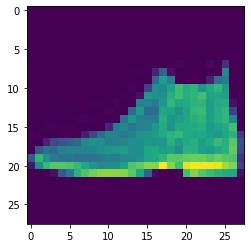

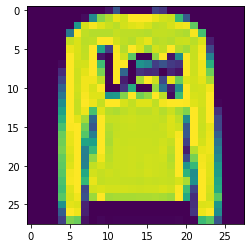

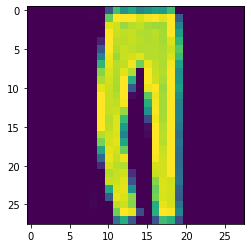

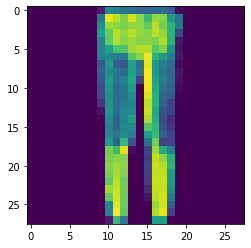

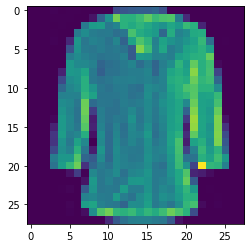

In [85]:
filenames = ['60001.png','60002.png','60003.png','60004.png','60005.png']
for file in filenames:
    img = load_img('/home/roshanbtech/Apparel_detection/test/' + file,   grayscale= True)
    plt.figure()
    plt.imshow(img)
    
    

In [ ]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [66]:
submission.to_csv('submission_dropout_0.4.csv',index=False)

## Transfer Learning -- VGG16


In [31]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [33]:
IMAGE_SIZE = [128,128]

In [34]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [35]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [36]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)


In [37]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

In [38]:
# create a model object
model_vgg = Model(inputs=vgg.input, outputs=prediction)

In [85]:
# view the structure of the model
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [39]:
# tell the model what cost and optimization method to use
model_vgg.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
r=model_vgg.fit_generator(train_datagen.flow(X_train,y_train,batch_size = BATCH_SIZE),
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)


In [40]:
%%time
r = model_vgg.fit_generator(train_datagen.flow(X_train,y_train,batch_size = BATCH_SIZE), 
                    steps_per_epoch= len(X_train) // BATCH_SIZE, epochs= 50 ,
                   validation_data= valid_datagen.flow(X_test,y_test,batch_size = BATCH_SIZE),
                    validation_steps = len(X_test) // BATCH_SIZE,
                    use_multiprocessing= True)


Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


  1/960 [..............................] - ETA: 8:30:28 - loss: 2.5320 - accuracy: 0.0600

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 337 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/960 [..............................] - ETA: 8:24:05 - loss: 2.3978 - accuracy: 0.1000

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 268 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/960 [..............................] - ETA: 8:21:22 - loss: 2.4253 - accuracy: 0.1400

/opt/conda/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 883 could not be retrieved. It could be because a worker has died.
  UserWarning)


  4/960 [..............................] - ETA: 8:19:44 - loss: 2.3125 - accuracy: 0.1850

KeyboardInterrupt: 

### Resnet

In [42]:

from keras.applications import ResNet50

In [43]:
# number of classes 
num_classes = 10

def get_model():
    
    # Get base model: ResNet50 
    base_model = ResNet50(weights='imagenet', include_top=False)
    
    # freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
        
    # Get the output from the base model 
    base_model_ouput = base_model.output
    
    # Adding our own layers at the end
    # global average pooling: computes the average of all values in the feature map
    x = GlobalAveragePooling2D()(base_model_ouput)
    
    # fully connected and 5-softmax layer
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax', name='fcnew')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model


In [44]:
model = get_model()
# compile it
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary of model
model.summary()


/opt/conda/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [46]:
%%time
r = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = BATCH_SIZE), 
                    steps_per_epoch= len(X_train) // BATCH_SIZE, epochs= 5 ,
                   validation_data= valid_datagen.flow(X_test,y_test,batch_size = BATCH_SIZE),
                    validation_steps = len(X_test) // BATCH_SIZE,
                    use_multiprocessing= True)

Epoch 1/5
959/960 [============================>.] - ETA: 1s - loss: 0.5476 - accuracy: 0.8023Epoch 1/5
Epoch 1/5
960/960 [==============================] - 2081s 2s/step - loss: 0.5476 - accuracy: 0.8023 - val_loss: 4.7624 - val_accuracy: 0.1002
Epoch 2/5
960/960 [==============================] - 2087s 2s/step - loss: 0.4645 - accuracy: 0.8295 - val_loss: 4.6215 - val_accuracy: 0.1002
Epoch 3/5
960/960 [==============================] - 2103s 2s/step - loss: 0.4401 - accuracy: 0.8378 - val_loss: 6.2063 - val_accuracy: 0.1002
Epoch 4/5
960/960 [==============================] - 2110s 2s/step - loss: 0.4200 - accuracy: 0.8462 - val_loss: 6.3891 - val_accuracy: 0.1002
Epoch 5/5
632/960 [==================>...........] - ETA: 9:52 - loss: 0.4048 - accuracy: 0.8478

Process ForkPoolWorker-16:
Process ForkPoolWorker-15:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf

KeyboardInterrupt: 

Process ForkPoolWorker-17:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [ ]:
model_resnet.save('model.h5')